#  CRICKET Data study and Analysis:

 Use of Data from:
<li> CricinfoESPN: Scorecards

*   Four types of data : Match results which gives bowling and batting results
*   Also get individual scores of batting , bowling  of individual players






In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:
with open('/content/t20_wc_match_results.json')as f:
  data = json.load(f)
len(data) # Checking the array of element
data[0]['matchSummary'] #Main list of Match Reuslts
df_match= pd.DataFrame(data[0]['matchSummary'])
df_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [11]:
df_match.shape

(45, 7)

In [12]:
#USing Score care as match ID which is primary key.
df_match.rename({'scorecard': 'match_id'}, axis = 1, inplace = True)
df_match.head()


,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [13]:
#To Create a dictionary of matches between countries and matching the match_id
match_ids_dict = {}

for index, row in df_match.iterrows():
  key1 = row['team1'] + 'Vs' + row['team2']
  key2 = row['team2'] + 'Vs' + row['team1']

  match_ids_dict[key1] = row['match_id']
  match_ids_dict[key2] = row['match_id']

match_ids_dict



{'NamibiaVsSri Lanka': 'T20I # 1823',
 'Sri LankaVsNamibia': 'T20I # 1823',
 'NetherlandsVsU.A.E.': 'T20I # 1825',
 'U.A.E.VsNetherlands': 'T20I # 1825',
 'ScotlandVsWest Indies': 'T20I # 1826',
 'West IndiesVsScotland': 'T20I # 1826',
 'IrelandVsZimbabwe': 'T20I # 1828',
 'ZimbabweVsIreland': 'T20I # 1828',
 'NamibiaVsNetherlands': 'T20I # 1830',
 'NetherlandsVsNamibia': 'T20I # 1830',
 'Sri LankaVsU.A.E.': 'T20I # 1832',
 'U.A.E.VsSri Lanka': 'T20I # 1832',
 'IrelandVsScotland': 'T20I # 1833',
 'ScotlandVsIreland': 'T20I # 1833',
 'West IndiesVsZimbabwe': 'T20I # 1834',
 'ZimbabweVsWest Indies': 'T20I # 1834',
 'NetherlandsVsSri Lanka': 'T20I # 1835',
 'Sri LankaVsNetherlands': 'T20I # 1835',
 'NamibiaVsU.A.E.': 'T20I # 1836',
 'U.A.E.VsNamibia': 'T20I # 1836',
 'IrelandVsWest Indies': 'T20I # 1837',
 'West IndiesVsIreland': 'T20I # 1837',
 'ScotlandVsZimbabwe': 'T20I # 1838',
 'ZimbabweVsScotland': 'T20I # 1838',
 'AustraliaVsNew Zealand': 'T20I # 1839',
 'New ZealandVsAustralia': '

In [14]:
 {'Namibia vs Sri Lanka': 'T20I # 1823',
    'Sri Lanka vs Namibia': 'T20I #1823'}

{'Namibia vs Sri Lanka': 'T20I # 1823', 'Sri Lanka vs Namibia': 'T20I #1823'}

**Batting Summary**


In [15]:
with open('/content/t20_wc_batting_summary.json') as f:
  data = json.load(f)
  all_records = []
  for rec in data:
      all_records.extend(rec['battingSummary']) #Creating flat list after joining the array
df_batting = pd.DataFrame(all_records)
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/†Mendis),44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c †Mendis b Theekshana,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,c †Green b Wiese,6,6,0,0,100.00


In [16]:
# Creating OUT or NOT-OUT based on dismissal columns

In [17]:
df_batting['out/not_out'] = df_batting.dismissal.apply(lambda x: 'out' if len(x) > 0 else 'not_out')
df_batting.head(11)


,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c †Mendis b Karunaratne,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/†Mendis),44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c †Mendis b Theekshana,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,c †Green b Wiese,6,6,0,0,100.00,out


In [18]:
df_batting.drop(columns= ['dismissal'], inplace = True)
df_batting.head(11)


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis†,6,6,0,0,100.00,out


In [19]:
df_batting ['batsmanName']= df_batting['batsmanName'].apply(lambda x: x.replace('†', ''))
df_batting ['batsmanName']= df_batting['batsmanName'].apply(lambda x: x.replace('\xa0', ''))
df_batting.head(11)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,out


Create a dictionary to join two tables
<li> Match results and Batting summary

In [20]:
df_batting['mach_id']= df_batting['match'].map(match_ids_dict)
df_batting.head()
#match_ids_dict

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,mach_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,NaN
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,NaN
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,NaN
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,NaN
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,NaN


Data Visualization :


In [21]:
df1 = pd.read_csv('/content/dim_match_summary.csv')
df2 = pd.read_csv('/content/dim_players.csv')
df3 = pd.read_csv('/content/fact_bating_summary.csv')
df4 = pd.read_csv('/content/fact_bowling_summary.csv')
df3.head(10)
df2.head(10)
df4.head(10)
df4.head(10)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,Gerhard Erasmus,1.0,0,8,0,8.00,1,1,0,0,0,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,David Wiese,4.0,0,16,2,4.00,13,1,0,0,0,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,Bernard Scholtz,4.0,0,18,2,4.50,10,1,0,0,0,T20I # 1823
8,Namibia Vs Sri Lanka,Namibia,Ben Shikongo,3.0,1,22,2,7.33,6,3,0,0,0,T20I # 1823
9,Namibia Vs Sri Lanka,Namibia,JJ Smit,3.0,0,16,1,5.33,7,0,0,1,0,T20I # 1823


In [22]:
df3 = df3.drop('SR', axis = 1)
df3.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,out,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,out,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,out,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,not_out,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,out,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,out,T20I # 1823


In [23]:
df3['strikeRate'] = (df3['runs'] / df3['balls']) * 100
df3['strikeRate'] = df3['strikeRate'].round(2)
df3.head(5)


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,out/not_out,match_id,strikeRate
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,out,T20I # 1823,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,out,T20I # 1823,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,out,T20I # 1823,166.67
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,out,T20I # 1823,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,out,T20I # 1823,83.33


In [24]:
#df_batting_player = pd.merge(df3, df4, left_on='batsmanName', right_on='match_id')
#df_batting_player.head(10)
#total_runs = df_batting_player.groupby('batsmanName')['runs'].sum().sort_values(ascending=False)
#print(total_runs.head(10))

In [25]:
best_strike_rate = df3.groupby('batsmanName')['strikeRate'].sum().sort_values(ascending=False)
print(best_strike_rate.head(10))


batsmanName
Suryakumar Yadav     1095.50
Kusal Mendis         1013.97
Max O'Dowd            887.47
Sikandar Raza         884.33
Bhanuka Rajapaksa     827.01
Paul Stirling         822.68
Lorcan Tucker         803.84
Shadab Khan           783.98
Virat Kohli           779.17
Sean Williams         763.36
Name: strikeRate, dtype: float64


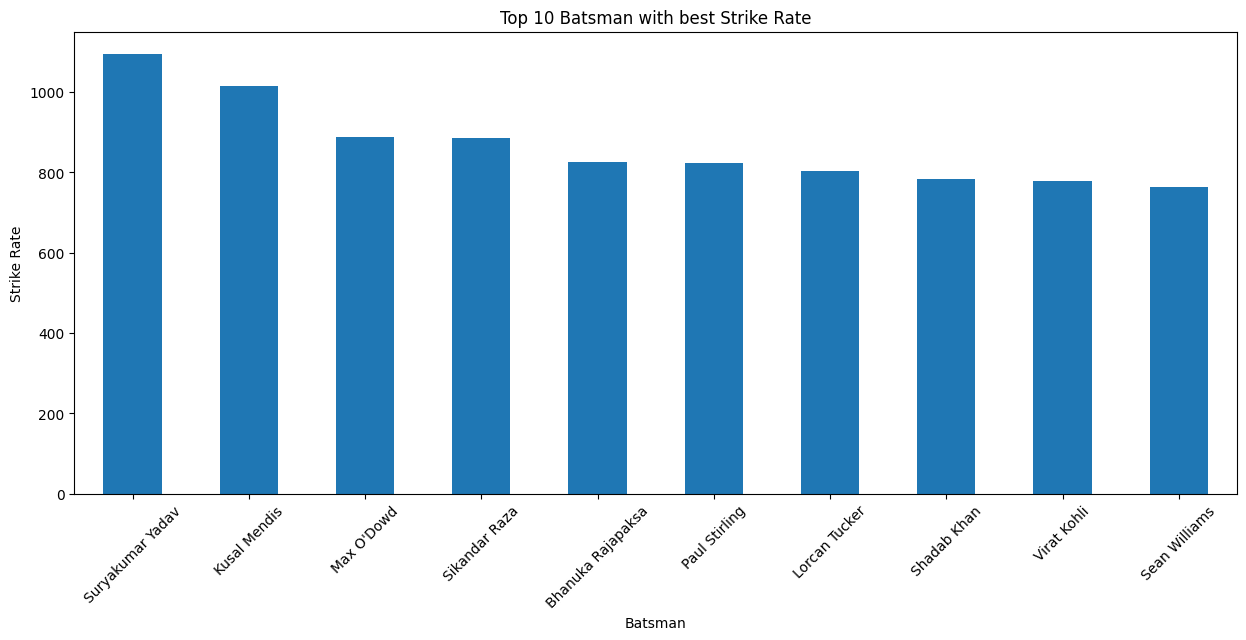

In [26]:
plt.figure(figsize=(15,6))
best_strike_rate.head(10).plot(kind='bar')
plt.title('Top 10 Batsman with best Strike Rate')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()
